In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [95]:
df= pd.read_csv('count_factor_code_comptable.csv',sep=',')

In [96]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_comptable     2140 non-null   int64  
 1   bank_count         2140 non-null   float64
 2   uni_count          2140 non-null   float64
 3   mall_count         2140 non-null   float64
 4   residential_count  2140 non-null   float64
 5   population_radius  2140 non-null   int64  
 6   lat                2140 non-null   float64
 7   lon                2140 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 133.9 KB


In [ ]:
surface=pd.read_csv('joined_df.csv', sep=',')

In [ ]:
df = df[['code_comptable', 'bank_count', 'uni_count', 'mall_count', 'residential_count', 'population_radius', 'lat', 'lon']]

df = pd.merge(df, surface[['code_comptable', 'superficie','wilaya']], on='code_comptable', how='left')
df.to_csv('bureau_de_poste_clusters.csv', index=False)
print("Saved to bureau_de_poste_clusters.csv")

Saved to bureau_de_poste_clusters.csv


In [ ]:
df['sum_population'] = df.groupby('wilaya')['population_radius'].transform('sum')

In [187]:
df['population_density'] = df['sum_population'] / df['superficie']

In [188]:
df.to_csv('bureau_de_poste_clusters.csv', index=False)
print("Saved to bureau_de_poste_clusters.csv")

Saved to bureau_de_poste_clusters.csv


In [ ]:
features = ['bank_count', 'uni_count', 'mall_count', 'residential_count','population_density']
X = df[features]


In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [101]:
print(X_scaled[0:5])

[[ 1.89394607 -0.31460946  2.34289402 -0.10023387  1.12231359 -0.28018184]
 [ 1.89394607 -0.31460946  2.34289402 -0.10023387  0.76055204 -0.28332733]
 [ 1.89394607 -0.31460946  2.34289402 -0.10023387  0.9407192  -0.28176079]
 [ 1.89394607 -0.31460946  2.34289402 -0.10023387 -0.50649494 -0.29434423]
 [ 1.89394607 -0.31460946  2.34289402 -0.10023387 -0.26912652 -0.29228032]]


c:\Users\PC-PHONE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC-PHONE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC-PHONE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC-PHONE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC-PHONE\anaconda3\Lib\site-package

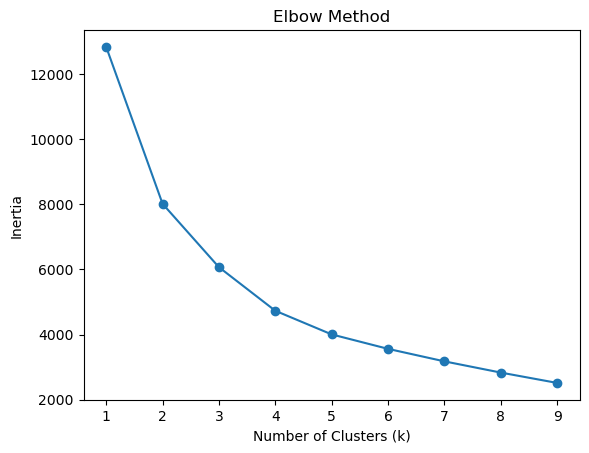

In [189]:

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [119]:
df.to_csv('post_office_clusters.csv', index=False)
print("Saved to bureau_de_poste_clusters.csv")


Saved to bureau_de_poste_clusters.csv


In [ ]:

df = pd.read_csv('bureau_de_poste_clusters.csv', sep=',')
features = [
    'bank_count',
    'uni_count',
    'mall_count',
    'residential_count',
    'population_density'
]


weights = np.array([0.45, 0.1, 0.05, 0.05, 0.5]) 


X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_weighted = X_scaled * weights

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_weighted)

df['cluster'] = clusters

cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)
df.to_csv('weighted_post_office_clusters.csv', index=False)


c:\Users\PC-PHONE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         bank_count  uni_count  mall_count  residential_count  \
cluster                                                         
0          0.135041   0.025029    0.060536           0.024447   
1          2.828571   0.247619    0.533333           0.571429   
2         12.266187   1.158273    1.748201           3.582734   
3          5.016854   0.432584    0.814607           1.348315   

         population_density  
cluster                      
0                230.400496  
1               3885.598765  
2                191.224281  
3                210.914486  


Interpretation:

    Cluster 1 → Densely populated urban areas
    Few banks and amenities, but very high population density. Could be dense neighborhoods with limited commercial development.

    Cluster 2 → Well-developed areas with many banks
    Very high counts of banks, universities, malls, and residentials – probably urban commercial hubs or city centers.

    Cluster 3 → Moderately developed areas
    Mid-range for all metrics. Could represent smaller towns or mixed-use suburbs.

    Cluster 0 → Low activity areas
    Barely any infrastructure, low density – likely rural or underdeveloped zones.



In [ ]:
%pip install folium

In [ ]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lon, df.lat),
    crs="EPSG:4326"
)

#Create Folium Map
#Center map at the mean location
map_center = [df.lat.mean(), df.lon.mean()]
fmap = folium.Map(location=map_center, zoom_start=6, tiles='CartoDB positron')

# Color palette for clusters
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'cadetblue']

#Plot points by cluster
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    marker_cluster = MarkerCluster(name=f'Cluster {cluster_id}').add_to(fmap)

    for _, row in cluster_data.iterrows():
        tooltip = (
            f"<strong>Wilaya:</strong> {row.get('wilaya', 'N/A')}<br>"
            f"<strong>Bank count:</strong> {row['bank_count']}<br>"
            f"<strong>Density:</strong> {row['population_density']:.2f}<br>"
            f"<strong>Cluster:</strong> {row['cluster']}"
        )
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=6,
            fill=True,
            color=cluster_colors[cluster_id % len(cluster_colors)],
            fill_opacity=0.7,
            popup=tooltip,
        ).add_to(marker_cluster)

# Add Layer Control
folium.LayerControl().add_to(fmap)

fmap.save("clustered_map.html")
print("Map saved as clustered_map.html")


Map saved as clustered_map.html


In [ ]:
if df is None:
	df = pd.read_csv('weighted_post_office_clusters.csv')

# Sort and save the DataFrame
df.sort_values(by='wilaya', inplace=True)
df.to_csv('weighted_post_office_clusters.csv', index=False)

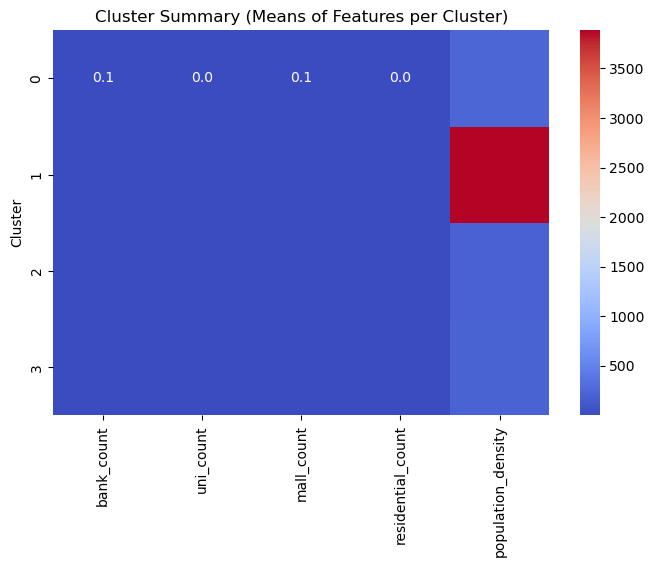

In [13]:
cluster_summary = df.groupby('cluster')[features].mean()
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Cluster Summary (Means of Features per Cluster)")
plt.ylabel("Cluster")
plt.show()

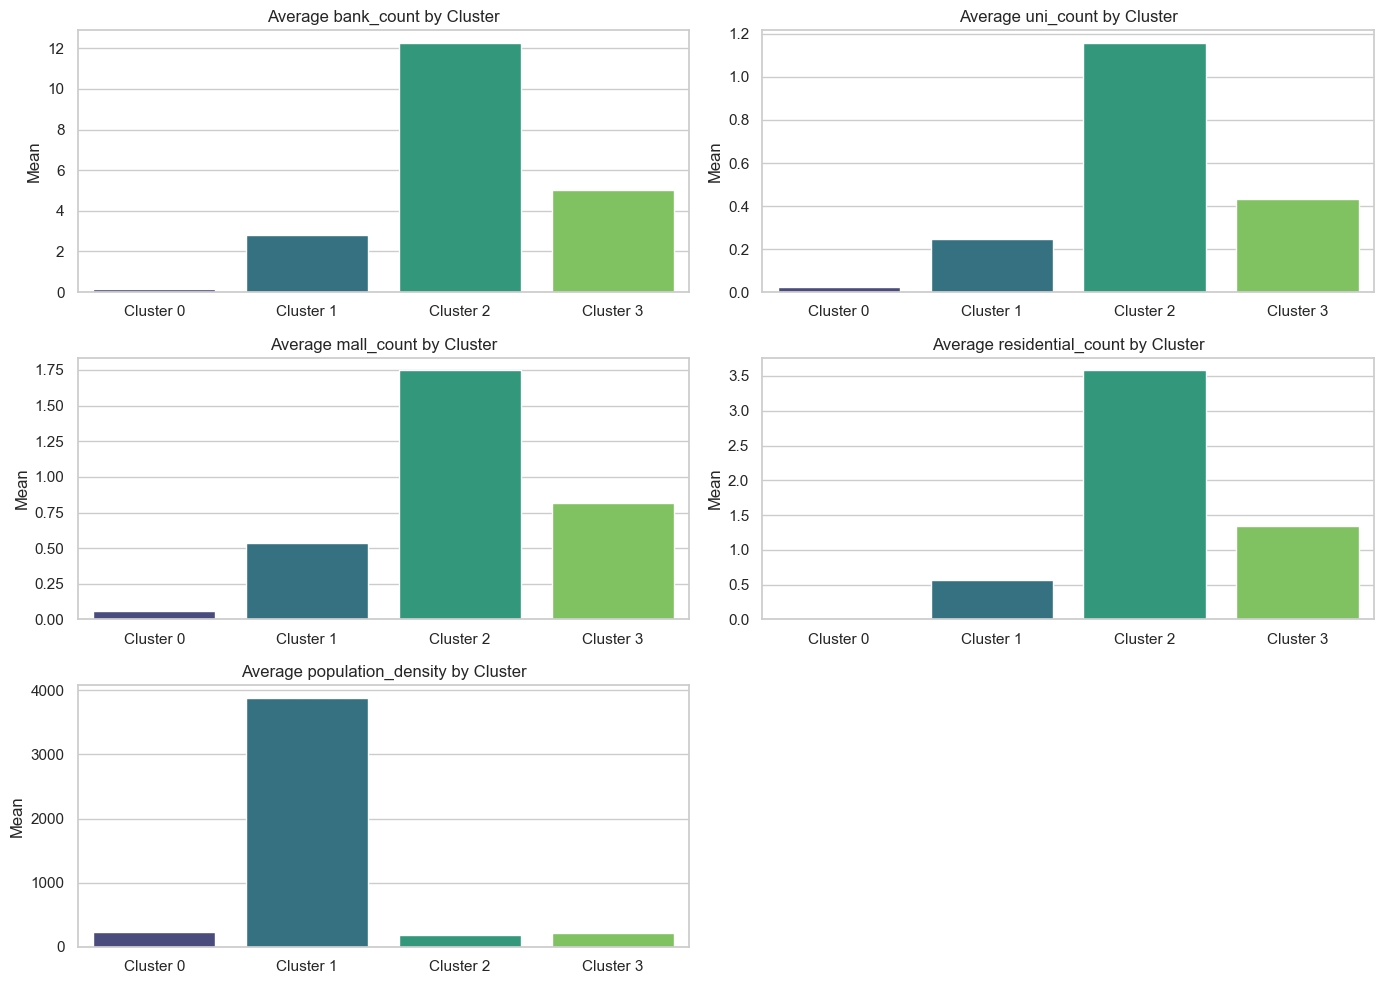

In [ ]:
cluster_summary = df.groupby('cluster')[features].mean()

sns.set(style='whitegrid')
cluster_summary.index = [f'Cluster {i}' for i in cluster_summary.index]

# Plot each feature in a subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(cluster_summary.columns):
    sns.barplot(x=cluster_summary.index, y=cluster_summary[feature], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average {feature} by Cluster')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Mean')

# Remove any empty subplot if features < 6
if len(cluster_summary.columns) < len(axes):
    for i in range(len(cluster_summary.columns), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
